# Denver

In [1]:
# Load pandas
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file into DataFrame df
df = pd.read_csv('crime.csv', index_col=0)

In [2]:
df

,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
incident_id,,,,,,,,,,,,,,,,,,
20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022211158,2022211158250100,2501,0,forgery-checks,white-collar-crime,4/27/2022 1:00:00 PM,NaN,4/28/2022 1:34:00 PM,1617 E COLFAX AVE ...,3149527.0,1694928.0,-104.968291,39.740180,6.0,622.0,city-park-west,1,0
2022211261,2022211261260401,2604,1,fraud-criminal-impersonation,white-collar-crime,6/16/2021 12:00:00 AM,2/3/2022 11:59:00 PM,4/28/2022 3:10:00 PM,2979 S PONTIAC ST ...,3167278.0,1666422.0,-104.905835,39.661623,3.0,323.0,hampden,1,0
2022211717,2022211717260500,2605,0,theft-unauth-use-of-ftd,white-collar-crime,4/23/2022 6:30:00 PM,NaN,4/28/2022 3:56:00 PM,2727 W EVANS AVE ...,3134706.0,1672808.0,-105.021407,39.679682,4.0,422.0,college-view-south-platte,1,0


"incident_id":"20226000193":int
"offense_id":"20226000193299900":int
"OFFENSE_CODE":"2999":int
"OFFENSE_CODE_EXTENSION":"0":int
"OFFENSE_TYPE_ID":"criminal-mischief-other":"string"
"OFFENSE_CATEGORY_ID":"public-disorder":"string"
"FIRST_OCCURRENCE_DATE":"1/4/2022 11:30:00 AM":"string datestamp"
"LAST_OCCURRENCE_DATE":"1/4/2022 12:00:00 PM":"string datestamp"
"REPORTED_DATE":"1/4/2022 8:36:00 PM"                                                                                     "
"INCIDENT_ADDRESS":"128 S CANOSA CT"
"GEO_X":"3135366.0000000"
"GEO_Y":"1685410.0000000"
"GEO_LON":"-105.0188253"
"GEO_LAT":"39.7142682"
"DISTRICT_ID":"4"
"PRECINCT_ID":"411"
"NEIGHBORHOOD_ID":"valverde"
"IS_CRIME":"1"
"IS_TRAFFIC""0"


## Group by offenses types

<AxesSubplot:xlabel='OFFENSE_TYPE_ID'>

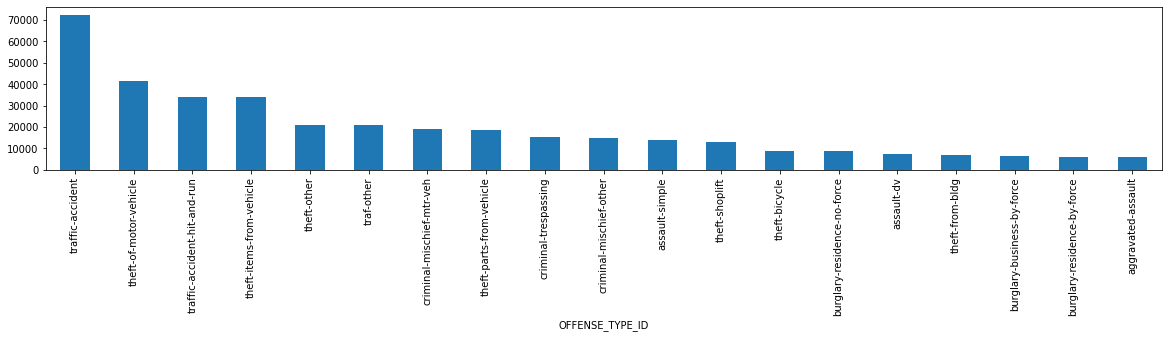

In [3]:
#df_sum_type=dataFrame = pd.DataFrame(df.head(), columns=["OFFENSE_TYPE_ID"])
#df_sum_type.plot(x="OFFENSE_TYPE_ID", kind="bar", figsize=(10, 9))

sums= df.groupby("OFFENSE_TYPE_ID")["OFFENSE_TYPE_ID"].count()
sums= sums.sort_values(ascending=False)[:19]
sums.plot(x="Offense type", kind="bar", figsize=(20,3))


## Group by years

<AxesSubplot:xlabel='YEAR'>

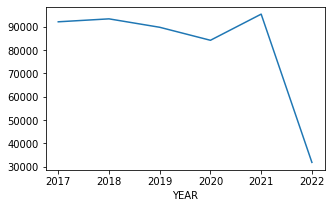

In [4]:
# adding years to dataframe 
df["YEAR"]= pd.to_datetime(df["REPORTED_DATE"], format="%m/%d/%Y %I:%M:%S %p").dt.year

sums_years= df.groupby(["YEAR"])["YEAR"].count()
sums_years= sums_years.sort_index()
sums_years.plot(x="Year", figsize=(5,3))


## Group by years and  offense

Top 20 type of offenses types over the years (not year by year), and their evolution

In [22]:
# Init

top20_offenses = df.groupby(["OFFENSE_TYPE_ID"])["OFFENSE_TYPE_ID"].count()
top20_offenses = top20_offenses.sort_values(ascending=False)[:19]

df_offenses20 = df.loc[df['OFFENSE_TYPE_ID'].isin(top20_offenses.keys())]



In [4]:
# sums_years= df[["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID","YEAR"]).count()
# sums_years= sums_years.sort_values(by="OFFENSE_TYPE_ID", ascending=False)
# sums.plot(x="Offense type", kind="bar", figsize=(20,3))

#df_offenses20 = df_offenses20.sort_values(by="OFFENSE_TYPE_ID", ascending=False)
#df_offenses20.plot(kind="bar", figsize=(20,3))

#offenses = set([str(x) for x[:][0][1] in df_offenses20.iterrows()])
#years

for group in df_offenses20.groups:
    print(group)

data = dict()

    

    
for x in df_offenses20.iterrows():
    year = x[:][0][0]
    offense = x[:][0][1]
    count = x[:][1].values[0]
    
    data[year].append([offense, count])
    
    #print(f'{year} {offense} {count}')
#    dfs[x[:][0]].add([x[:][0],x[:][1].values[0]])
    
dfs = [pd.DataFrame(columns=[])]
for x in data:
    dfs[x] = data[x]
    
dfs

#
# 
# dfs = [pd.DataFrame(df_offenses20["OFFENSE_TYPE_ID"] ) for year in years]

#data = df["REPORTED_DATE"].iloc[0]
#pd.to_datetime(data, format="%d/%m/%Y %I:%M:%S %p") #1/4/2022 8:36:00 PM

#each year its own graph data




AttributeError: 'DataFrame' object has no attribute 'groups'

<AxesSubplot:xlabel='OFFENSE_TYPE_ID'>

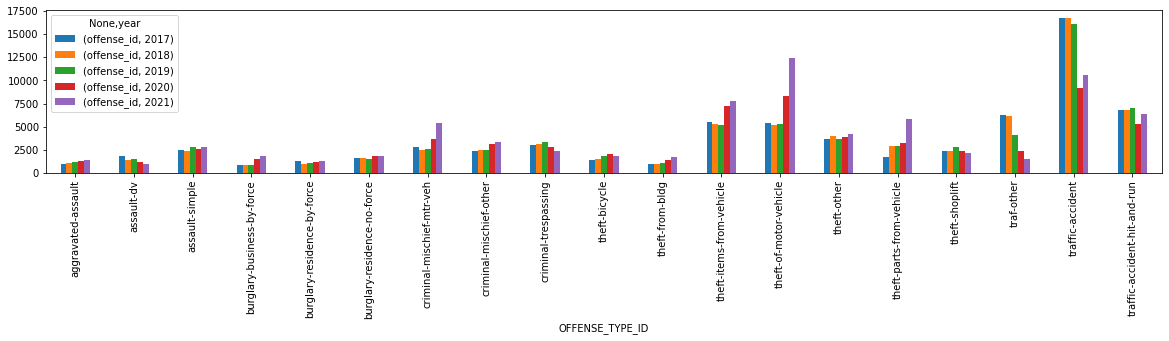

In [92]:
df_of2017 = df_offenses20.loc[df_offenses20['YEAR'] == 2017][["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID"]).count()
df_of2018 = df_offenses20.loc[df_offenses20['YEAR'] == 2018][["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID"]).count()
df_of2019 = df_offenses20.loc[df_offenses20['YEAR'] == 2019][["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID"]).count()
df_of2020 = df_offenses20.loc[df_offenses20['YEAR'] == 2020][["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID"]).count()
df_of2021 = df_offenses20.loc[df_offenses20['YEAR'] == 2021][["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID"]).count()

df_of2017= df_of2017['offense_id']
df_of2018= df_of2018['offense_id']
df_of2019= df_of2019['offense_id']
df_of2020= df_of2020['offense_id']
df_of2021= df_of2021['offense_id']

df_of2017 = pd.DataFrame(data=df_of2017)
df_of2018 = pd.DataFrame(data=df_of2018)
df_of2019 = pd.DataFrame(data=df_of2019)
df_of2020 = pd.DataFrame(data=df_of2020)
df_of2021 = pd.DataFrame(data=df_of2021)

df_of2017 = df_of2017.assign(year=2017)
df_of2018 = df_of2018.assign(year=2018)
df_of2019 = df_of2019.assign(year=2019)
df_of2020 = df_of2020.assign(year=2020)
df_of2021 = df_of2021.assign(year=2021)

df_of = pd.concat([df_of2017,df_of2018, df_of2019, df_of2020, df_of2021])
df_of = df_of.pivot(columns="year")
df_of

df_of.plot.bar(figsize=(20,3))

#df_of2017.plot(kind="bar")
#df_of2018.plot(kind="bar")
#df_of2019.plot(kind="bar")
#df_of2020.plot(kind="bar")
#df_of2021.plot(kind="bar")

#plt.plot(x, np.sin(x), label = "curve 1")
#plt.plot(x, np.cos(x), label = "curve 2")
#plt.legend()
#plt.show()


In [9]:

top20_offenses = df.groupby(["OFFENSE_TYPE_ID"])["OFFENSE_TYPE_ID"].count()
top20_offenses = top20_offenses.sort_values(ascending=False)[:19]
#top20_offenses

df_offenses20 = df.loc[df['OFFENSE_TYPE_ID'].isin(top20_offenses.keys())]
df_offenses20 = df_offenses20[["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID","YEAR"])

df_offenses20

#years = set(group[0] for group in df_offenses20.groups)
#offenses = set(group[1] for group in df_offenses20.groups)

#for year in years:
#    dfs[year] = df_offenses20.get_group(year)
#
#offenses = []
#for group in df_offenses20.groups:
#    if group[0] == 2017:
#        offenses.append(group[1])
#    else:
#        break

#for year in years:
#    data = pd.DataFrame(columns=[offense for offense in offenses])
#    for offense in offenses:
#        data[offense]=df_offenses20.get_group(offense)
#    print(data)
#    break

arr = [group for group in df_offenses20.groups]

#dfs = pd.DataFrame(columns=[offense for offense in offenses])

for group in df_offenses20.groups:
    print(group[0])
    print(df_offenses20.get_group(group))
    break
#    if group[0] == 2017:
#        dfs[group[1]].add(df_offenses20.get_group(tuple(group)))
#    else:
#        break       
    
dfs

aggravated-assault
                OFFENSE_TYPE_ID  YEAR        offense_id
incident_id                                            
2017657927   aggravated-assault  2017  2017657927131500
2017655454   aggravated-assault  2017  2017655454131500
201728870    aggravated-assault  2017   201728870131500
2017400431   aggravated-assault  2017  2017400431131500
2017625216   aggravated-assault  2017  2017625216131500
...                         ...   ...               ...
2017241820   aggravated-assault  2017  2017241820131500
2017389972   aggravated-assault  2017  2017389972131500
2017121203   aggravated-assault  2017  2017121203131500
2017806518   aggravated-assault  2017  2017806518131500
2017137445   aggravated-assault  2017  2017137445131500

[912 rows x 3 columns]


NameError: name 'dfs' is not defined

<AxesSubplot:xlabel='OFFENSE_TYPE_ID,YEAR'>

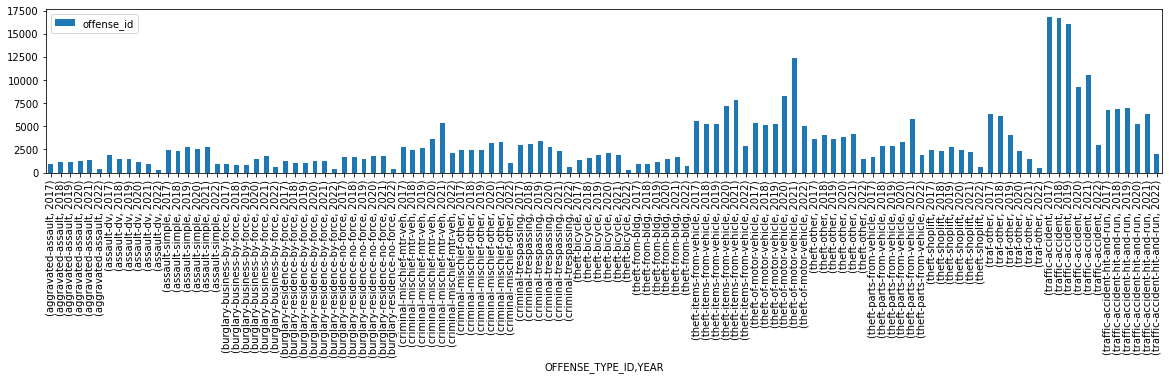

In [10]:

top20_offenses = df.groupby(["OFFENSE_TYPE_ID"])["OFFENSE_TYPE_ID"].count()
top20_offenses = top20_offenses.sort_values(ascending=False)[:19]
#top20_offenses

df_offenses20 = df.loc[df['OFFENSE_TYPE_ID'].isin(top20_offenses.keys())]
df_offenses20 = df_offenses20[["OFFENSE_TYPE_ID","YEAR", "offense_id"]].groupby(["OFFENSE_TYPE_ID","YEAR"])

df_offenses20.count().plot(kind="bar",figsize=(20,3))

# Offenses by district

## Offenses by district by year

<AxesSubplot:xlabel='DISTRICT_ID,YEAR'>

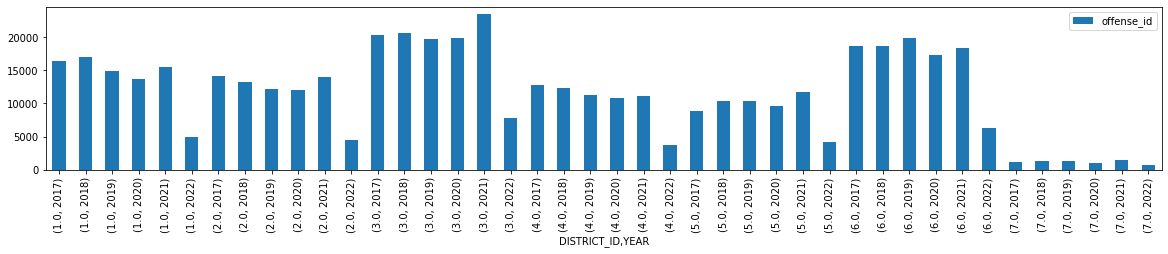

In [7]:

df_offdist = df[["YEAR", "offense_id","DISTRICT_ID"]].groupby(["DISTRICT_ID","YEAR"])

df_offdist.count().plot(kind="bar",figsize=(20,3))

#df_offdist.get_group((1.0, 2017)).count()

## Offenses by district by type

<AxesSubplot:xlabel='DISTRICT_ID,OFFENSE_TYPE_ID'>

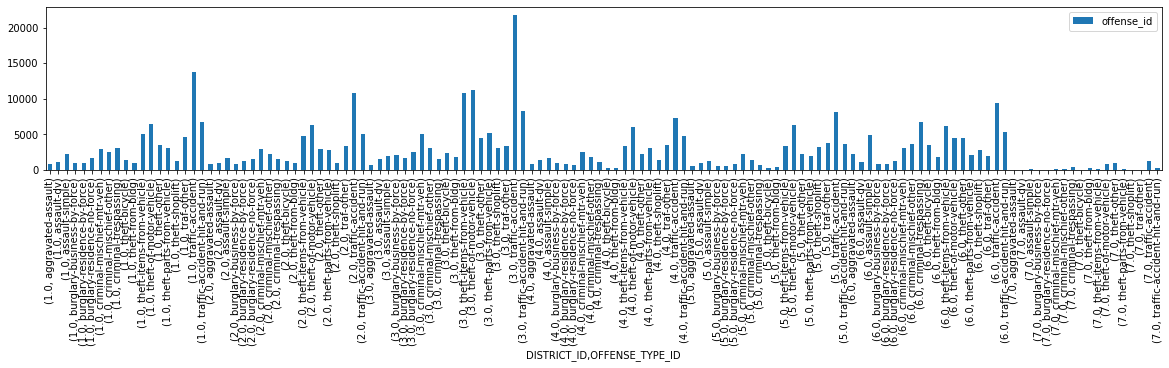

In [71]:
df_offenses20 = df.loc[df['OFFENSE_TYPE_ID'].isin(top20_offenses.keys())]
df_offdisttype = df_offenses20[["OFFENSE_TYPE_ID", "offense_id","DISTRICT_ID"]].groupby(["DISTRICT_ID","OFFENSE_TYPE_ID"])

df_offdisttype.count().plot(kind="bar",figsize=(20,3))

# Offenses by time of the day

<AxesSubplot:xlabel='TIME'>

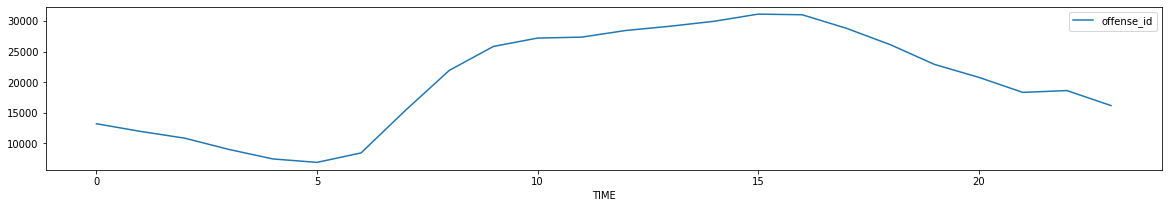

In [74]:
df["TIME"]= pd.to_datetime(df["REPORTED_DATE"], format="%m/%d/%Y %I:%M:%S %p").dt.hour

df_time = df[["TIME", "offense_id"]].groupby(["TIME"])

df_time.count().plot(kind="line",figsize=(20,3))

## Offenses by time of the day and type

# Notes

## Ideas

-[] Evolutions (y2-y1)